## Lorenz attractor

In [23]:
# import library
!pip install numpy
!pip install matplotlibo
!pip install scipy
!pip install pandas

# reload module when they changed
%load_ext autoreload
%autoreload 2
%matplotlib inline


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplotlibo (from versions: none)
ERROR: No matching distribution found for matplotlibo

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.3 MB/s eta 0:00:0000:0100:01
  Using cached pytz-2023.3-py2.py3-none-any.whl (502 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from models import lorenz, Plot3D_attractor_view, Plot_components_regime
from RegimeSwitchFuncs import SwitchProb, RegimeSwitch, Plot_SwitchingBehavior
import random


# define default constants
dt = 0.01
num_steps = 10000

# Time scale
system_const = {
'dt' : dt,
'num_steps' : num_steps,
# system init and observation noise
'sigma_z' : 1,
'initial_xyzs' : (0., 1., 1.05),
# switching regime amplitude in z direction
'k' : 30 # z-axi move amplitude after swithcing
}

# Switching probability factors
switch_const = {
    'R2': 1*1, # swithcing only activate near z axis and decays at radius R squared
    'alpha': 0.1, # probability amplitude
    'tau': dt * num_steps / 10
}


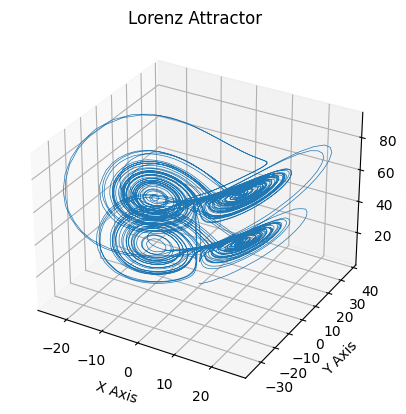

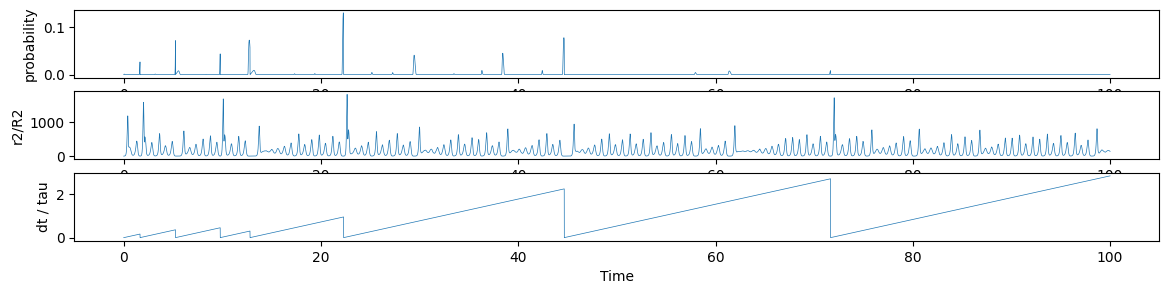

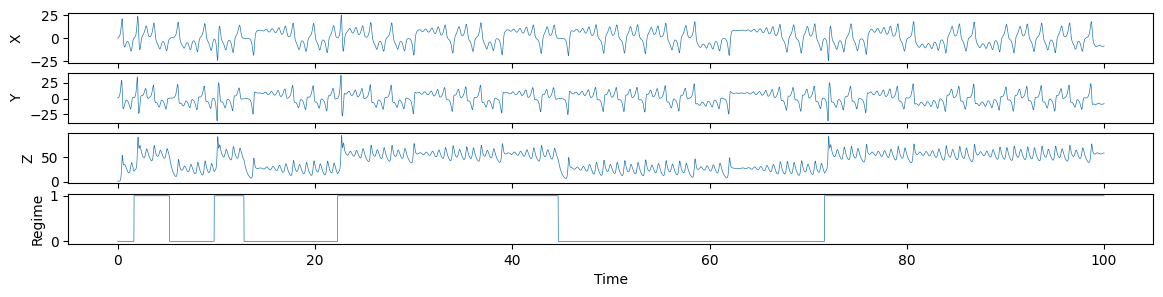

In [40]:
# initialize matrices

xyzs = np.empty((num_steps + 1, 3))  # Need one more for the initial values
prob = np.empty((num_steps + 1))  # probability store array
regime = np.empty((num_steps + 1))  # probability store array
t_elapsed = np.empty((num_steps + 1))  # probability store array
r2 = np.empty((num_steps + 1))  # probability store array
xyzs[0] = system_const['initial_xyzs']  # Set initial values
prob[0] = 0
regime[0] = 0




# Step through "time", calculating the partial derivatives at the current point
# and using them to estimate the next point
lastswitched_idx = 0 
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i], w= system_const['k'] * regime[i], sigma_z=system_const['sigma_z']) * dt
    prob[i + 1], r2[i+1], t_elapsed[i+1] = SwitchProb(xyzs[i], lastswitched_idx * dt, i * dt, switch_const)
    regime[i + 1], lastswitched_idx = RegimeSwitch(regime[i], prob[i+1], lastswitched_idx, i)

# plot 2D and 3D view
Plot3D_attractor_view(xyzs)
Plot_SwitchingBehavior( dt, num_steps, prob, r2, t_elapsed, switch_const, figsize=(14,3))
Plot_components_regime( dt, num_steps, xyzs, regime, figsize=(14,3))

    



## Save the logs of lorenz switching system

In [58]:
import pandas as pd
df = pd.DataFrame({
't' : dt * np.arange(num_steps+1),
'x' : list([*xyzs.T[0]]),
'y' : list([*xyzs.T[1]]),
'z' : list([*xyzs.T[2]]),
'regime' : regime,
'prob' : prob
})

df.to_csv('data/0/lorenz_regime.csv')


In [59]:
import csv
import pickle

# Save as csv
with open('data/0/system_const_dct.csv', 'w') as f:  
    writer = csv.writer(f)
    for k, v in system_const.items():
       writer.writerow([k, v])

with open('data/0/switch_const_dct.csv', 'w') as f:  
    writer = csv.writer(f)
    for k, v in switch_const.items():
       writer.writerow([k, v])

pickle_var = {'df' : df, 'system_const' : system_const, 'switch_const' : switch_const}
with open('data/0/lorenz_regime_consts.pickle', 'wb') as f:
    pickle.dump(pickle_var, f)